In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

2022-12-06 22:46:22.503087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Without Library Functions

In [3]:
#CODE FROM LABS
def pca(X):
    """
    Performs PCA on multivariate data.

    Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

    Returns:
    (numpy array of floats)   : Data projected onto the new basis
    (numpy array of floats)   : eigenvectors
    (numpy array of floats)   : corresponding eigenvalues

    """

    #np.cov(X)
    # Subtract the mean of X
    X_bar = X - np.mean(X, axis=0)
    # Calculate the sample covariance matrix
    cov_matrix = 1 / X.shape[0] * np.matmul(X_bar.T, X_bar)
    # Calculate the eigenvalues and eigenvectors
    evals, evectors = np.linalg.eigh(cov_matrix)
    # Sort the eigenvalues in descending order
    evals, evectors = sort_evals_descending(evals, evectors)
    # Project the data onto the new eigenvector basis
    score = np.matmul(X, evectors)

    return score, evectors, evals

def plot_eigenvalues(evals, limit=True):
    """
    Plots eigenvalues.
    """

    plt.figure(figsize=(10,4))
    plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
    plt.xlabel('Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree plot')
    if limit:
        plt.xlim([0, 100])  # limit x-axis up to 100 for zooming
        
def sort_evals_descending(evals, evectors):
    """
    Sorts eigenvalues and eigenvectors in decreasing order. This function
    also aligns the first two eigenvectors to be in first two quadrants if
    the data is 2D (remember that any eigenvector's direction can be inverted
    and it is still an eigenvector with the same eigenvalue). 
    """

    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    if evals.shape[0] == 2:
        if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]
    return evals, evectors


In [4]:
# Scaling data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.reshape(x_train.shape[0],-1))
X_test_scaled = scaler.fit_transform(x_test.reshape(x_test.shape[0],-1))

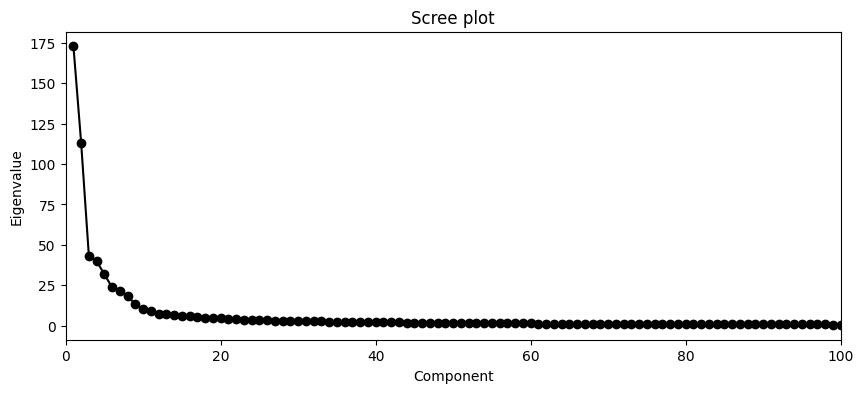

In [5]:
score, evectors, evals = pca(X_train_scaled)
plot_eigenvalues(evals, limit=True)

# With Library functions

In [14]:
sklearn_pca = PCA()
X_pca = sklearn_pca.fit_transform(X_train_scaled)

print(f'Variance for 1st PCA is - {sklearn_pca.explained_variance_ratio_[0]}')
print(f'Variance for 2nd PCA is - {sklearn_pca.explained_variance_ratio_[1]}')
print(f'Variance for 3rd PCA is - {sklearn_pca.explained_variance_ratio_[2]}')
print(f'Variance for 4th PCA is - {sklearn_pca.explained_variance_ratio_[3]}')
print(f'Variance for 5th PCA is - {sklearn_pca.explained_variance_ratio_[4]}')

Variance for 1st PCA is - 0.22083547297081763
Variance for 2nd PCA is - 0.14414632613620484
Variance for 3rd PCA is - 0.054611763922909784
Variance for 4th PCA is - 0.050886856892047874
Variance for 5th PCA is - 0.04054886517839382


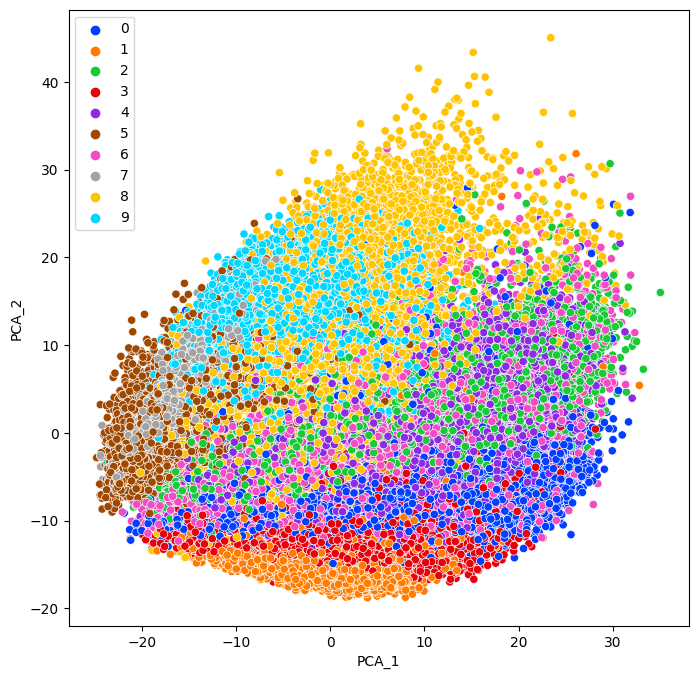

In [13]:
sklearn_pca = PCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=["PCA_1", "PCA_2"])

plt.figure(figsize=(8,8))
g = sns.scatterplot(x="PCA_1", y="PCA_2", hue=y_train, data=pca_df, palette=sns.color_palette("bright"), legend='full')